## Product Recommendation System for **Afiliya**
A well developed recommendation system will help businesses improve their shopper's experience on App and result in better customer acquisition and retention.

The recommendation system, Our have designed below is based on the journey of a new customer from the time he/she lands on the business’s Afiliya for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 2 parts based on the business context:

* **Recommendation system part I:** Product pupularity based system targetted at new customers

* **Recommendation system part II:** Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

When a new customer without any previous purchase history visits the Afiliya for the first time, he/she is recommended the most popular products sold on the market. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the Afiliya. The latter part is done using collaborative filtering techniques.

## Recommendation System - Part I
### Product popularity based recommendation system targeted at new customers
* Popularity based are a great strategy to target the new customers with the most popular products sold on a Afiliya and is very useful to cold start a recommendation engine.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [50]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/ratings_Beauty.csv')
df.rename(columns={'UserId': 'ShopId'}, inplace=True)
rating = df.head(10000)
ratings = rating.dropna()
ratings.head()

,ShopId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [52]:
ratings.shape

(10000, 4)

In [53]:
popular_products = pd.DataFrame(ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B00004TUBL,558
B000052YM7,412
B000050B6U,377
B000052YP6,341
B000052YMR,313
B000052XZP,288
B000052YOL,255
B000052YOR,228
B000052YJH,198


<Axes: xlabel='ProductId'>

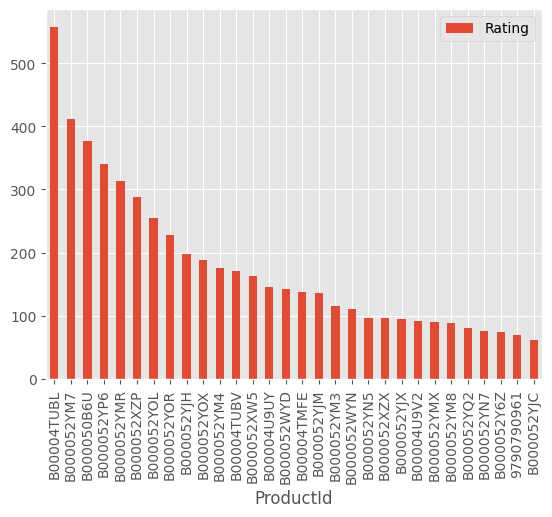

In [54]:
most_popular.head(30).plot(kind = "bar")

** Analysis:**

* The above graph gives us the most popular products (arranged in descending order) sold by the business.

* For eaxmple, product, ID # B00004TUBL has sales of over 558 product

## Recommendation System - Part II
### Model-based collaborative filtering system

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

#### Utility Matrix based on products sold and user reviews
**Utility Matrix : **An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [55]:
# Subset of Ratings

ratings1 = ratings.head(10000)

In [57]:
ratings_utility_matrix = ratings1.pivot_table(values='Rating', index='ShopId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
ShopId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [58]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [59]:
X = ratings_utility_matrix.T
X.head()

ShopId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X.shape

(886, 9697)

Unique products in subset of data

In [61]:
X1 = X
print(X1)

ShopId      A00205921JHJK5X9LNP42  A024581134CV80ZBLIZTZ  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0                      0   
0733001998                      0                      0   
0737104473                      0                      0   
0762451459                      0                      0   
...                           ...                    ...   
B000052YPU                      0                      0   
B000052YPV                      0                      0   
B000052YPY                      0                      0   
B000052YQ0                      0                      0   
B000052YQ2                      0                      0   

ShopId      A03056581JJIOL5FSKJY7  A03099101ZRK4K607JVHH  \
ProductId                                                  
0205616461                      0                      0   
0558925278                      0      

### Decomposing the Matrix

In [62]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [63]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

### Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [64]:
X.index[:99]

Index(['0205616461', '0558925278', '0733001998', '0737104473', '0762451459',
       '1304139212', '1304139220', '130414089X', '130414643X', '1304146537',
       '130414674X', '1304168522', '1304174778', '1304174867', '1304174905',
       '1304196046', '1304196062', '1304196070', '1304196135', '1304351475',
       '1304482596', '1304482634', '1304482685', '1304488608', '1304495396',
       '1304511073', '1304511081', '1304511111', '130451112X', '1304511138',
       '1304511146', '1304511154', '1304622193', '1304622223', '1304622428',
       '1304622452', '1304622460', '1304622622', '1304622657', '1304622665',
       '1304624498', '1304624544', '1304651029', '1304651088', '130465110X',
       '1304651118', '1304651347', '1304665704', '1304665720', '130466578X',
       '1403790965', '1412759676', '1451646526', '1457982633', '1572671203',
       '1879187396', '1906987238', '1929099886', '1987958179', '3222000565',
       '322700075X', '3227001055', '3227001381', '3292000971', '3423470476',

Index # of product ID purchased by customer

In [65]:
# X.index[99]
i = X.index[99] #6117036094

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
# print(f'index : {product_ID}')
# print('product ID : '+i)

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [66]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [67]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)
Recommend[0:9] #top 10 correlation product ID

['1304482634',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304622223',
 '1304622460',
 '1304624544',
 '3222000565',
 '3227001055']

**Product Id # **
Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the Afiliya.